In [0]:
pip install yahoo_finance_api2

  Stored in directory: /root/.cache/pip/wheels/af/fc/9e/54be65b5ff75f526b464837f8a6b0ee521e545c59b219bd862
  Stored in directory: /root/.cache/pip/wheels/42/d4/c6/16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124
Successfully built yahoo-finance-api2 pprint


In [0]:
pip install yfinance

  Stored in directory: /root/.cache/pip/wheels/e8/9b/5a/a0dc81508455c34afcf2833513c3b9de3f39662d9ee2f92612
Successfully built yfinance


In [0]:
import yfinance as yf
import datetime

stocks = ["TCS.NS"]
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,1,1)
df = yf.download(stocks, start=start, end=end)
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

[*********************100%***********************]  1 of 1 downloaded


In [0]:
!pip install pyramid.arima


     |████████████████████████████████| 604kB 5.1MB/s 


In [0]:
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
originalList=[1,2,3,4,5,6,7,8,9,10]
newList = originalList[int(len(originalList) * .05) : int(len(originalList) * .95)]
print()

### LSTM

In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open'])
for i in range(0,len(data)):
    new_data['Date'][i] = data.index[i]
    new_data['Close'][i] = data['Close'][i]
    new_data['Open'][i] = data['Open'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0: int(len(dataset) * .80)]

valid = dataset[int(len(dataset) * .80):,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,2)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 154s - loss: 0.0010


ValueError: ignored

In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

64.7936797806681

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


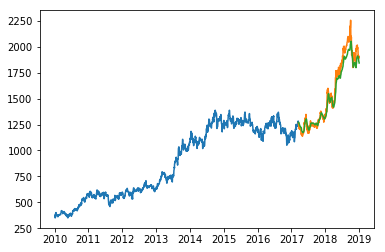

In [0]:
import matplotlib.pyplot as plt
#for plotting
train = new_data[0:int(len(dataset) * .80)]
valid = new_data[int(len(dataset) * .80):]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

### Auto Arima

In [0]:
from pyramid.arima import auto_arima
import pandas as pd
import numpy as np

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open'])
for i in range(0,len(data)):
    new_data['Date'][i] = data.index[i]
    new_data['Close'][i] = data['Close'][i]
    new_data['Open'][i] = data['Open'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
train = data[0:int(len(dataset) * .80)]
valid = data[int(len(dataset) * .80):]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=262)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14464.917, BIC=14492.291, Fit time=44.065 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15556.082, BIC=15567.032, Fit time=0.602 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15075.440, BIC=15097.339, Fit time=15.201 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14462.887, BIC=14484.786, Fit time=13.552 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14461.845, BIC=14489.219, Fit time=45.569 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=15075.467, BIC=15097.366, Fit time=12.460 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14466.286, BIC=14499.135, Fit time=60.949 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15552.935, BIC=15569.359, Fit time=4.189 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=14465.728, BIC=14504.051, Fit time=35.239 seconds
Fit

ValueError: ignored

In [0]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

220.6825808405628

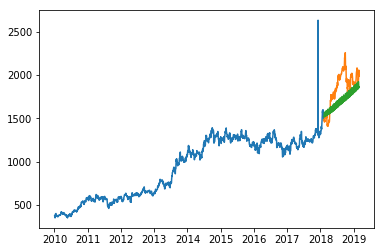

In [0]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

###KNN

In [0]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))








array([[ 283.482117],
       [ 283.180389],
       [ 276.731659],
       ...,
       [2032.500854],
       [1963.719849],
       [1971.043335]])

In [0]:
import pandas as pd
import numpy as np

x=df.iloc[:,[1,2,3,5]].values
y=df.iloc[:,4:5].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) # split training and test data



In [0]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [0]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))

In [0]:
y

array([[ 283.482117],
       [ 283.180389],
       [ 276.731659],
       ...,
       [2032.500854],
       [1963.719849],
       [1971.043335]])

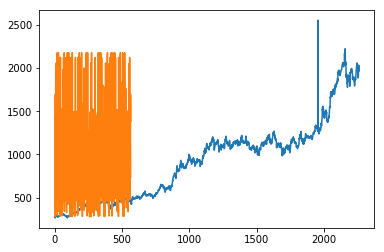

In [0]:
#plot
import matplotlib.pyplot as plt
# y['Predictions'] = 0
# y['Predictions'] = preds
plt.plot(y)
plt.plot(preds)

###LINEAR REGRESSION

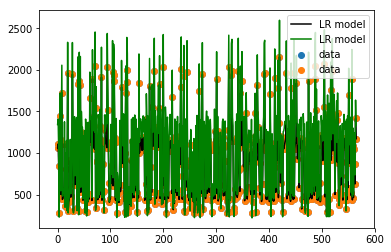

In [0]:
# Linear Regression model
from sklearn.linear_model import LinearRegression 
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)

plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_test,color='black',label='LR model')
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
plt.legend()

###RANDOM FOREST

In [0]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


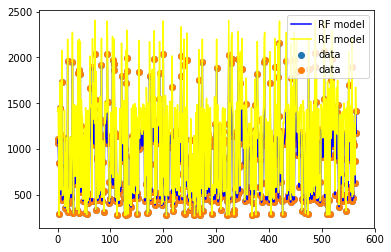

In [0]:
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_test,color='blue',label='RF model')
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_rf,color='yellow',label='RF model')
plt.legend()

###GRADIENT BOOSTING


In [0]:

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(n_estimators=200)
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


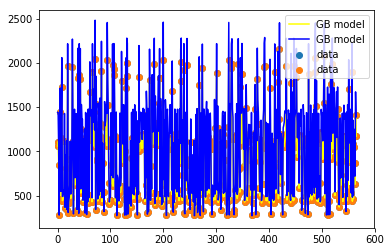

In [0]:
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_test,color='yellow',label='GB model')
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_gb,color='blue',label='GB model')
plt.legend()